In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup #to beautify xml output
from lxml import etree as ET #read and write xml files
pd.options.display.max_columns=50

import os
from os import listdir
from os.path import isfile, join

import time


In [1]:
import geopandas as gp
taz=gp.read_file('../SF-CHAMP Outputs/TAZ2454_clean.shp')

<AxesSubplot:>

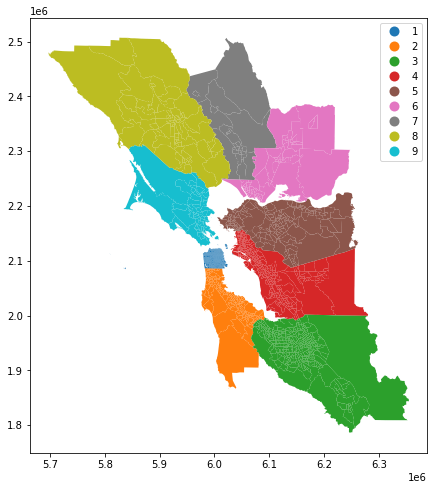

In [14]:
taz.plot(column='COUNTY',categorical=True,legend=True,figsize=[15,8])

In [6]:
taz.groupby('COUNTY').agg({'TAZ':['max','min']})

TAZ      
         max   min
COUNTY            
1        981     1
2       1346  1191
3       1714  1347
4       2039  1715
5       2210  2040
6       2290  2211
7       2317  2291
8       2403  2318
9       2454  2404

In [2]:
def county(x):
    if x<1191:
        return "San Francisco"
    elif x<1347:
        return "San Mateo"
    elif x<1715:
        return "Santa Clara"
    elif x<2040:
        return "Almeda"
    elif x<2211:
        return "Contra Costa"
    elif x<2291:
        return "Solano"
    elif x<2318:
        return "Napa"
    elif x<2404:
        return 'Sonoma'
    else:
        return "Marin"

In [3]:
# Read the trips file from SF-CHAMP output
trip=pd.read_table('../SF-CHAMP Outputs/_trip_2.dat',sep='\t',header='infer')

In [4]:
#Trip main mode type (1=walk, 2=bike, 3=sov, 4=hov 2, 5=hov 3+, 
    #6=walk to transit, 7=park and ride, 8=school bus, 9=TNC, 10=other – survey only)

trip['mode'].value_counts()

3    9739903
4    6044271
5    4240606
1    2675329
6    1334513
2     533561
9     391248
8      84731
Name: mode, dtype: int64

In [4]:
trip['Orig_County']=trip['otaz'].apply(county)
trip['Dest_County']=trip['dtaz'].apply(county)

In [5]:
sf_orig=trip[(trip['Orig_County']=='San Francisco')|(trip['Dest_County']=='San Francisco')]

almeda=trip[(trip['Orig_County']=='Almedao')&(trip['Dest_County'].isin(['Marin','San Mateo']))]

contra=trip[(trip['Orig_County']=='Contra Costa')&(trip['Dest_County'].isin(['San Mateo']))]

marin=trip[(trip['Orig_County']=='Marin')&(trip['Dest_County'].isin(['Almeda','San Mateo','Santa Clara']))]

napa=trip[(trip['Orig_County']=='Napa')&(trip['Dest_County'].isin(['San Mateo']))]

sonoma=trip[(trip['Orig_County']=='Sonoma')&(trip['Dest_County'].isin(['San Mateo','Santa Clara']))]

sanmateo=trip[(trip['Orig_County']=='San Mateo')&(trip['Dest_County'].isin(['Almeda','Contra Costa','Marin','Solano','Napa','Sonoma']))]

santaclara=trip[(trip['Orig_County']=='Santa Clara')&(trip['Dest_County'].isin(['Sonoma','Marin']))]

solano=trip[(trip['Orig_County']=='Solano')&(trip['Dest_County'].isin(['San Mateo']))]
        

In [6]:
trip=pd.concat([sf_orig,almeda,contra,marin,napa,sonoma,sanmateo,santaclara,solano],ignore_index=True)

trip.head()

,id,tour_id,hhno,pno,day,tour,half,tseg,tsvid,opurp,dpurp,oadtyp,dadtyp,opcl,otaz,dpcl,dtaz,mode,pathtype,dorp,deptm,arrtm,endacttm,travtime,travcost,travdist,vot,trexpfac,Orig_County,Dest_County
0,9101,91,9,1,1,1,1,1,0,0,1,1,2,720,1,2673,440,3,2,1,419,435,934,16.59,0.5652,4.71,10.980627,1,San Francisco,San Francisco
1,9151,91,9,1,1,1,2,1,0,1,0,2,1,2673,440,720,1,3,2,1,934,950,179,16.67,0.5604,4.67,10.980627,1,San Francisco,San Francisco
2,5101,51,5,1,1,1,1,1,0,0,5,1,4,720,1,2239,924,6,3,4,578,610,632,32.07,0.4150,6.07,5.281956,1,San Francisco,San Francisco
3,5151,51,5,1,1,1,2,1,0,5,0,4,1,2239,924,720,1,6,3,4,632,663,179,31.57,0.4150,6.00,5.281956,1,San Francisco,San Francisco
4,18101,181,15,2,1,1,1,1,0,0,5,1,4,20,1,1301,918,3,2,1,902,917,926,15.52,0.5112,4.26,2.950609,1,San Francisco,San Francisco


In [7]:
sf_orig=None
almeda=None
contra=None
marin=None
napa=None
sonoma=None
sanmateo=None
santaclara=None
solano=None

solano


In [46]:
pd.crosstab(trip.Orig_County,trip.Dest_County)

Dest_County,Almeda,Contra Costa,Marin,Napa,San Francisco,San Mateo,Santa Clara,Solano,Sonoma
Orig_County,,,,,,,,,
Almeda,0,0,0,0,162467,0,0,0,0
Contra Costa,0,0,0,0,59824,12425,0,0,0
Marin,20285,0,0,0,56342,6494,1068,0,0
Napa,0,0,0,0,1029,239,0,0,0
San Francisco,163417,59108,56532,967,3106642,291610,18666,7455,7745
San Mateo,107195,12258,6366,241,291537,0,0,1392,1115
Santa Clara,0,0,1068,0,18898,0,0,0,222
Solano,0,0,0,0,7604,1423,0,0,0
Sonoma,0,0,0,0,7799,1181,225,0,0


In [8]:
mzone = pd.read_csv('../SF-CHAMP Outputs/mzone_short.csv') #MZONE coordinates in EPSG 26910 projection
mzone.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
#trip=trip[(trip['otaz']<1000)|(trip['dtaz']<1000)]

In [18]:
trip[trip['hhno']=='456251']

,id,tour_id,hhno,pno,day,tour,half,tseg,tsvid,opurp,dpurp,oadtyp,dadtyp,opcl,otaz,dpcl,dtaz,mode,pathtype,dorp,deptm,arrtm,endacttm,travtime,travcost,travdist,vot,trexpfac,person_id,trip_type
3832461,1051012251,10510122,456251,1,1,2,2,1,0,7,4,4,4,117633,1227,1098,47,3,2,1,1291,1324,1363,33.88,1.8480,15.40,12.133046,1,456251-1,ext-int
3832462,1051012252,10510122,456251,1,1,2,2,2,0,4,0,4,1,1098,47,116834,1227,3,2,1,1363,1397,179,34.46,1.8648,15.54,12.133046,1,456251-1,int-ext


In [6]:
len(trip)

4317642

In [9]:
#decoding the columns

def trip_purpose(x): 
    #(0=home, 1=work, 2=school, 3=escort, 4=personal business (& medical), 
    #5=shopping, 6=meal, 7=social (& recreation), 8=recreation (H version only) 
    #9=medical (H version only), 10=change mode at a park and ride lot
    #according to the sf-light scenario population.xml all the following purposes are valid
    #maybe needs activity-intercepts or activity-parameters
    if x==0:
        return 'home'
    elif x==1:
        return 'work'
    elif x==2:
        return 'school'
    elif x==3:
        return 'escort'
    elif x==4:
        return 'business'
    elif x==5:
        return 'shopping'
    elif x==6:
        return "meal"
    else:
        return 'other'
    
def convert_time(x): 
    #ARRTM, DEPTM, ENDTM etc is in minutes after 3 AM
    return time.strftime("%H:%M:%S", time.gmtime(x*60+180))

def mode_type(df):
    #Trip main mode type (1=walk, 2=bike, 3=sov, 4=hov 2, 5=hov 3+, 
    #6=walk to transit, 7=park and ride, 8=school bus, 9=TNC, 10=other – survey only)
    if df['mode']==1:
        return 'walk'
    elif df['mode']==2:
        return 'bike'
    elif df['mode']==3:
        return 'car'
    elif df['mode']==4:
        #return 'car'
        if df['dorp']==1:
            return 'car'
        else:
            return 'passenger'
    elif df['mode']==5:
        #return 'car'
        if df['dorp']==1:
            return 'car'
        else:
            return 'passenger'
    elif df['mode']==6:
        return 'walk_transit'
    elif df['mode']==7:
        return 'drive_transit'
    elif df['mode']==9:
        return 'ride_hail'
    else:
        return 'other'

def trip_type_location(df):
    if df['otaz']<1000 and df['dtaz']<1000:
        return 'int-int'
    elif df['otaz']<1000 and df['dtaz']>1000:
        return 'int-ext'
    elif df['otaz']>1000 and df['dtaz']>1000:
        return 'ext-ext'
    else:
        return 'ext-int'
    

def data_cleanup(trip_test,mzone):
    
    trip_test['hhno']=trip_test['hhno'].astype(str)
    trip_test['pno']=trip_test['pno'].astype(str)
    
    

    
    trip_test['trip_type']=trip_test.apply(trip_type_location,axis=1)
    
    trip_test['person_id']=np.where(trip_test['trip_type']=='int-int',
                                    trip_test['hhno']+'-'+trip_test['pno'],
                                    'ix-'+trip_test['hhno']+'-'+trip_test['pno'])
    
    plans=trip_test[['hhno','pno','tour_id',
    'person_id', #format is hh number-person number
    'trip_type',#i-x type
    'opurp',#The purpose at the trip origin (0=home, 1=work, 2=school, 3=escort, 4=personal business (& medical), 5=shopping, 6=meal, 7=social (& recreation), 8=recreation (H version only) 9=medical (H version only), 10=change mode at a park and ride lot
    'dpurp',#the purpose at trip destination
    #'oadtyp',#Trip origin address type (1=home, 2=usual work location, 3=usual school location, 4=other location in region, 5=out of region/missing (survey data only), 6=inserted change mode location for park and ride
    #'dadtyp',#trip dest. address type
    'opcl',#trip origin parcel
    'dpcl',#trip dest parcel
    #'otaz',#origin TAZ
    #'dtaz',#dest TAZ
    'mode',#Trip mode (1=walk, 2=bike, 3=sov, 4=hov 2, 5=hov 3+, 6=walk to transit, 7=park and ride, 8=school bus, 9=TNC, 10=other – survey only) 
    'dorp',#For auto trips, 1=driver, 2=passenger; for transit trips, is set to the total walk access+egress time, in integer minutes 
    'deptm',#The trip departure time, in minutes after midnight (or hours*100+minute for estimation mode)
    'arrtm',#trip arrival time
    'endacttm',#activity end time,
        'vot'
    ]]

    plans['trip_origin_purpose']=plans['opurp'].apply(trip_purpose)
    plans['trip_dest_purpose']=plans['dpurp'].apply(trip_purpose)
    plans['departure_time']=plans['deptm'].apply(convert_time)
    plans['arrival_time']=plans['arrtm'].apply(convert_time)
    plans['end_activity_time']=plans['endacttm'].apply(convert_time)
    plans['mode']=plans.apply(mode_type,axis=1)
    
    plans=plans[['hhno','pno','person_id', 'tour_id','trip_type', 'opcl', 'dpcl',
                 'mode', 'dorp', 'trip_origin_purpose','trip_dest_purpose',
                 'departure_time', 'arrival_time', 'end_activity_time','vot']]
    plans.sort_values(['person_id','departure_time'],inplace=True)
    
#     if trip_type=='all internal':
#         plans_df=plans[plans['trip_type']=='int-int']
#     elif trip_type=='all within':
#         plans_df=plans[plans['trip_type']!='ext-ext']
#     else:
#         plans_df=plans
    
    
    plans_maz_orig=pd.merge(plans,mzone,left_on=['opcl'],right_on=['MAZID'],how='left')

    plans_maz_all=pd.merge(plans_maz_orig,mzone,left_on=['dpcl'],right_on=['MAZID'],how='left')

    plans_maz_all=plans_maz_all.rename(columns={'X_COORD_x':'X_ORIG',
                                                'Y_COORD_x':'Y_ORIG',
                                                'X_COORD_y':'X_DEST',
                                                'Y_COORD_y':'Y_DEST'})

    plans_maz_all.drop(columns=['MAZID_x','MAZID_y'],inplace=True)
    
    plans_maz_all=plans_maz_all.drop_duplicates()
    
    trip_test=None
    mzone=None
    return (plans_maz_all)

In [10]:
tour=pd.read_table('../SF-CHAMP Outputs/_tour_2.dat',sep='\t',header='infer')

In [12]:
trip.head()

,id,tour_id,hhno,pno,day,tour,half,tseg,tsvid,opurp,dpurp,oadtyp,dadtyp,opcl,otaz,dpcl,dtaz,mode,pathtype,dorp,deptm,arrtm,endacttm,travtime,travcost,travdist,vot,trexpfac,Orig_County,Dest_County
0,9101,91,9,1,1,1,1,1,0,0,1,1,2,720,1,2673,440,3,2,1,419,435,934,16.59,0.5652,4.71,10.980627,1,San Francisco,San Francisco
1,9151,91,9,1,1,1,2,1,0,1,0,2,1,2673,440,720,1,3,2,1,934,950,179,16.67,0.5604,4.67,10.980627,1,San Francisco,San Francisco
2,5101,51,5,1,1,1,1,1,0,0,5,1,4,720,1,2239,924,6,3,4,578,610,632,32.07,0.4150,6.07,5.281956,1,San Francisco,San Francisco
3,5151,51,5,1,1,1,2,1,0,5,0,4,1,2239,924,720,1,6,3,4,632,663,179,31.57,0.4150,6.00,5.281956,1,San Francisco,San Francisco
4,18101,181,15,2,1,1,1,1,0,0,5,1,4,20,1,1301,918,3,2,1,902,917,926,15.52,0.5112,4.26,2.950609,1,San Francisco,San Francisco


In [15]:
tour.head()

,id,person_id,person_day_id,hhno,pno,day,tour,jtindex,parent,subtrs,pdpurp,tlvorig,tardest,tlvdest,tarorig,toadtyp,tdadtyp,topcl,totaz,tdpcl,tdtaz,tmodetp,tpathtp,tautotime,tautocost,tautodist,tripsh1,tripsh2,phtindx1,phtindx2,fhtindx1,fhtindx2,toexpfac
0,91,9,9,9,1,1,1,0,0,0,1,419,435,934,950,1,2,720,1,2673,440,3,2,16.63000,0.562800,4.690000,1,1,0,0,0,0,1
1,51,5,5,5,1,1,1,0,0,0,5,578,610,632,663,1,4,720,1,2239,924,6,3,14.17000,0.724200,6.035000,1,1,0,0,0,0,1
2,181,18,18,15,2,1,1,0,0,0,5,902,917,926,941,1,4,20,1,1301,918,3,2,15.61000,0.523200,4.360000,1,1,0,0,0,0,1
3,281,28,28,20,2,1,1,0,0,0,5,675,706,716,747,1,4,720,1,3868,21,1,1,5.40956,0.193698,1.614153,1,1,0,0,0,0,1
4,11,1,1,1,1,1,1,0,0,0,6,667,718,788,840,1,4,720,1,3173,950,6,3,20.17000,0.864600,7.205000,1,1,0,0,0,0,1


In [11]:
tour['hhno']=tour['hhno'].astype(str)
tour['pno']=tour['pno'].astype(str)
    
tour=tour[['hhno','pno','pdpurp','id']]
tour=tour.rename(columns={'id':'tour_id'})
tour['tour_purpose']=tour['pdpurp'].apply(trip_purpose)

In [17]:
tour[tour['hhno']=='3']

,hhno,pno,pdpurp,tour_id,tour_purpose
7,3,1,4,33,business
8,3,1,1,31,work
9,3,1,1,32,work


In [56]:
trip[trip['hhno']=='3']

,id,tour_id,hhno,pno,day,tour,half,tseg,tsvid,opurp,dpurp,oadtyp,dadtyp,opcl,otaz,dpcl,dtaz,mode,pathtype,dorp,deptm,arrtm,endacttm,travtime,travcost,travdist,vot,trexpfac,Orig_County,Dest_County,trip_type,person_id
14,3301,33,3,1,1,3,1,1,0,0,4,1,4,20,1,111357,1208,9,2,11,486,494,546,8.880086,0.268989,2.241575,3.642535,1,San Francisco,San Mateo,int-ext,ix-3-1
15,3351,33,3,1,1,3,2,1,0,4,0,4,1,111357,1208,20,1,9,2,11,546,554,603,8.947141,0.268989,2.241575,3.642535,1,San Mateo,San Francisco,ext-int,ix-3-1
16,3101,31,3,1,1,1,1,1,0,0,1,1,4,20,1,190,743,6,3,2,603,636,791,33.280000,0.000000,6.800000,4.079022,1,San Francisco,San Francisco,int-int,3-1
17,3151,31,3,1,1,1,2,1,0,1,0,4,1,190,743,20,1,6,6,2,791,824,923,33.210000,0.000000,6.590000,4.079022,1,San Francisco,San Francisco,int-int,3-1
18,3201,32,3,1,1,2,1,1,0,0,1,1,2,20,1,2618,952,6,6,2,923,957,1102,34.750000,0.000000,7.550000,7.123276,1,San Francisco,San Francisco,int-int,3-1
19,3251,32,3,1,1,2,2,1,0,1,0,2,1,2618,952,20,1,6,6,2,1102,1136,179,34.530000,0.000000,7.250000,7.123276,1,San Francisco,San Francisco,int-int,3-1


In [12]:
households=pd.read_table('../SF-CHAMP Outputs/_household_2.dat',sep='\t',header='infer')
person=pd.read_table('../SF-CHAMP Outputs/_person_2.dat',sep='\t',header='infer')

In [42]:
person=pd.read_table('../SF-CHAMP Outputs/_person_2.dat',sep='\t',header='infer')
person.head()

,id,hhno,pno,pptyp,pagey,pgend,pwtyp,pwpcl,pwtaz,pwautime,pwaudist,pstyp,pspcl,pstaz,psautime,psaudist,puwmode,puwarrp,puwdepp,ptpass,ppaidprk,pdiary,pproxy,psexpfac
0,2,2,1,4,44,2,0,-1,-1,-1.0,-1.0,0,-1,-1,-1.0,-1.0,-1,-1,-1,0,1,-1,-1,1
1,31,22,1,3,76,1,0,-1,-1,-1.0,-1.0,0,-1,-1,-1.0,-1.0,-1,-1,-1,1,1,-1,-1,1
2,32,22,2,3,66,2,0,-1,-1,-1.0,-1.0,0,-1,-1,-1.0,-1.0,-1,-1,-1,1,1,-1,-1,1
3,23,18,1,4,52,2,0,-1,-1,-1.0,-1.0,0,-1,-1,-1.0,-1.0,-1,-1,-1,0,1,-1,-1,1
4,24,18,2,1,52,1,1,-999,-1,-1.0,-1.0,0,-1,-1,-1.0,-1.0,-1,-1,-1,0,1,-1,-1,1


In [13]:
person=person[['hhno','pno','pagey','pgend']]

In [14]:
households['hhno']=households['hhno'].astype(str)
households=households[['hhno','hhvehs','hhwkrs','hhincome']]

In [15]:
%%time
plans_df=data_cleanup(trip,mzone)

<ipython-input-9-bbde874444f4>:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plans['trip_origin_purpose']=plans['opurp'].apply(trip_purpose)
<ipython-input-9-bbde874444f4>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plans['trip_dest_purpose']=plans['dpurp'].apply(trip_purpose)
<ipython-input-9-bbde874444f4>:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Wall time: 4min 36s


In [16]:
def exclude_non_car(df):
    if df['trip_type']!='int-int':
        if df['mode']=='car':
            return 1
        else:
            return 0
    else:
        return 1

In [17]:
plans_df['Exclude_Mode']=plans_df.apply(exclude_non_car,axis=1)

In [18]:
plans_df=plans_df[plans_df['Exclude_Mode']==1]

In [19]:
person['hhno']=person['hhno'].astype(str)
person['pno']=person['pno'].astype(str)

In [73]:
person.dtypes

id            int64
hhno         object
pno          object
pptyp         int64
pagey         int64
pgend         int64
pwtyp         int64
pwpcl         int64
pwtaz         int64
pwautime    float64
pwaudist    float64
pstyp         int64
pspcl         int64
pstaz         int64
psautime    float64
psaudist    float64
puwmode       int64
puwarrp       int64
puwdepp       int64
ptpass        int64
ppaidprk      int64
pdiary        int64
pproxy        int64
psexpfac      int64
dtype: object

In [20]:
tour_hh=pd.merge(tour,households,on=['hhno'])
#tour_hh=tour_hh.drop_duplicates(['hhno','pno'])
tour_hh.drop(columns=['pdpurp'],inplace=True)
tour_hh_person=pd.merge(tour_hh,person,on=['hhno','pno'])
tour_hh_person=tour_hh_person.drop_duplicates(['hhno','pno','tour_id'])
tour_hh_person.head()

,hhno,pno,tour_id,tour_purpose,hhvehs,hhwkrs,hhincome,pagey,pgend
0,9,1,91,work,1,1,30020,54,1
1,5,1,51,shopping,1,0,18373,79,2
2,15,2,181,shopping,1,0,9165,66,2
3,20,2,281,shopping,1,1,36487,55,1
4,1,1,11,meal,0,0,942,55,2


In [83]:
tour_hh_person.head()

,hhno,pno,tour_id,tour_purpose,hhvehs,hhwkrs,hhincome,pagey,pgend
0,9,1,91,work,1,1,30020,54,1
1,5,1,51,shopping,1,0,18373,79,2
2,15,2,181,shopping,1,0,9165,66,2
3,20,2,281,shopping,1,1,36487,55,1
4,1,1,11,meal,0,0,942,55,2


In [94]:
224654/1589378

0.14134711818082293

In [93]:
plans_df.groupby('mode').agg({'person_id':'nunique'})

,person_id
mode,
bike,64442
car,841912
other,4798
passenger,329059
ride_hail,106624
walk,338142
walk_transit,409696


In [21]:
tour_hh_person['pgend']=np.where(tour_hh_person['pgend']==1,
                                'male','female')
tour_hh_person['pagey']=tour_hh_person['pagey'].astype(str)

In [22]:
tour_hh_person['tour_id']=tour_hh_person['tour_id'].astype(str)
plans_df['tour_id']=plans_df['tour_id'].astype(str)

In [86]:
tour_hh_person.head()

,hhno,pno,tour_id,tour_purpose,hhvehs,hhwkrs,hhincome,pagey,pgend
0,9,1,91,work,1,1,30020,54,male
1,5,1,51,shopping,1,0,18373,79,female
2,15,2,181,shopping,1,0,9165,66,female
3,20,2,281,shopping,1,1,36487,55,male
4,1,1,11,meal,0,0,942,55,female


In [23]:
plans_df_attribs=pd.merge(plans_df,tour_hh_person,on=['tour_id'],how='left')
plans_df_attribs.tail()

,hhno_x,pno_x,person_id,tour_id,trip_type,opcl,dpcl,mode,dorp,trip_origin_purpose,trip_dest_purpose,departure_time,arrival_time,end_activity_time,vot,X_ORIG,Y_ORIG,X_DEST,Y_DEST,Exclude_Mode,hhno_y,pno_y,tour_purpose,hhvehs,hhwkrs,hhincome,pagey,pgend
3962137,999912,1,ix-999912-1,24431301,int-ext,1484,212667,car,1,work,home,18:04:00,19:17:00,03:02:00,10.362322,552669.315990,4.181258e+06,595853.632653,4.131419e+06,1,999912,1,work,3,1,27443,65,female
3962138,99992,2,ix-99992-2,2764011,int-ext,2519,118166,car,1,home,work,11:26:00,11:48:00,19:54:00,44.240896,552242.437167,4.179782e+06,551316.715860,4.166631e+06,1,99992,2,work,1,2,75108,58,male
3962139,99992,2,ix-99992-2,2764011,ext-int,118166,2519,car,1,work,home,19:54:00,20:13:00,03:02:00,44.240896,551316.715860,4.166631e+06,552242.437167,4.179782e+06,1,99992,2,work,1,2,75108,58,male
3962140,99995,2,ix-99995-2,2764131,int-ext,2519,113742,car,1,home,work,08:24:00,08:51:00,12:21:00,69.301269,552242.437167,4.179782e+06,559574.203285,4.157655e+06,1,99995,2,work,1,2,145595,35,female
3962141,99995,2,ix-99995-2,2764131,ext-int,113742,2519,car,1,work,home,15:25:00,15:54:00,03:02:00,28.779597,559574.203285,4.157655e+06,552242.437167,4.179782e+06,1,99995,2,work,1,2,145595,35,female


In [24]:
plans_df_attribs['MODE']=np.where(plans_df_attribs['trip_type']=='int-int',
                                 '',
                                 plans_df_attribs['mode'])
plans_df_attribs.tail()

,hhno_x,pno_x,person_id,tour_id,trip_type,opcl,dpcl,mode,dorp,trip_origin_purpose,trip_dest_purpose,departure_time,arrival_time,end_activity_time,vot,X_ORIG,Y_ORIG,X_DEST,Y_DEST,Exclude_Mode,hhno_y,pno_y,tour_purpose,hhvehs,hhwkrs,hhincome,pagey,pgend,MODE
3962137,999912,1,ix-999912-1,24431301,int-ext,1484,212667,car,1,work,home,18:04:00,19:17:00,03:02:00,10.362322,552669.315990,4.181258e+06,595853.632653,4.131419e+06,1,999912,1,work,3,1,27443,65,female,car
3962138,99992,2,ix-99992-2,2764011,int-ext,2519,118166,car,1,home,work,11:26:00,11:48:00,19:54:00,44.240896,552242.437167,4.179782e+06,551316.715860,4.166631e+06,1,99992,2,work,1,2,75108,58,male,car
3962139,99992,2,ix-99992-2,2764011,ext-int,118166,2519,car,1,work,home,19:54:00,20:13:00,03:02:00,44.240896,551316.715860,4.166631e+06,552242.437167,4.179782e+06,1,99992,2,work,1,2,75108,58,male,car
3962140,99995,2,ix-99995-2,2764131,int-ext,2519,113742,car,1,home,work,08:24:00,08:51:00,12:21:00,69.301269,552242.437167,4.179782e+06,559574.203285,4.157655e+06,1,99995,2,work,1,2,145595,35,female,car
3962141,99995,2,ix-99995-2,2764131,ext-int,113742,2519,car,1,work,home,15:25:00,15:54:00,03:02:00,28.779597,559574.203285,4.157655e+06,552242.437167,4.179782e+06,1,99995,2,work,1,2,145595,35,female,car


In [75]:
tour_hh_person[tour_hh_person['hhno']=='99999']

,hhno,pno,tour_id,tour_purpose,hhvehs,hhwkrs,hhincome,id,pptyp,pagey,pgend,pwtyp,pwpcl,pwtaz,pwautime,pwaudist,pstyp,pspcl,pstaz,psautime,psaudist,puwmode,puwarrp,puwdepp,ptpass,ppaidprk,pdiary,pproxy,psexpfac
410566,99999,1,2764322,school,2,1,22533,276432,5,35,2,2,3741,819,15.055,3.66,1,2650,71,10.375000,4.035000,-1,-1,-1,1,0,-1,-1,1
410567,99999,1,2764323,escort,2,1,22533,276432,5,35,2,2,3741,819,15.055,3.66,1,2650,71,10.375000,4.035000,-1,-1,-1,1,0,-1,-1,1
410568,99999,1,2764321,school,2,1,22533,276432,5,35,2,2,3741,819,15.055,3.66,1,2650,71,10.375000,4.035000,-1,-1,-1,1,0,-1,-1,1
410569,99999,3,2764341,school,2,1,22533,276434,7,11,2,0,-1,-1,-1.000,-1.00,1,2950,243,6.640952,1.666832,-1,-1,-1,1,1,-1,-1,1
410570,99999,3,2764342,other,2,1,22533,276434,7,11,2,0,-1,-1,-1.000,-1.00,1,2950,243,6.640952,1.666832,-1,-1,-1,1,1,-1,-1,1
410571,99999,5,2764361,escort,2,1,22533,276436,4,24,2,0,-1,-1,-1.000,-1.00,0,-1,-1,-1.000000,-1.000000,-1,-1,-1,1,1,-1,-1,1
410572,99999,5,2764362,escort,2,1,22533,276436,4,24,2,0,-1,-1,-1.000,-1.00,0,-1,-1,-1.000000,-1.000000,-1,-1,-1,1,1,-1,-1,1
410573,99999,5,2764363,shopping,2,1,22533,276436,4,24,2,0,-1,-1,-1.000,-1.00,0,-1,-1,-1.000000,-1.000000,-1,-1,-1,1,1,-1,-1,1


In [28]:
plans_df[['person_id']].to_csv('agent_id.csv.gz',index=False,compression='gzip')

In [16]:
len(plans_df)

3962142

In [23]:
trip['mode'].value_counts()

3    1259889
6     854374
4     769996
1     720999
5     510938
9     245682
2     121990
8       6971
Name: mode, dtype: int64

In [115]:
bike=plans_df_attribs[plans_df_attribs['mode']=='bike'][['hhno_x','mode']]
#bike=bike.drop_duplicates()
bike.head()

,hhno_x,mode
2,10,bike
3,10,bike
18,1000,bike
19,1000,bike
75,100001,bike


In [117]:
bike.groupby(['hhno_x']).agg({'mode':'count'}).to_csv('../SF_CHAMP_Converted/bike.csv.gz',compression='gzip')

In [113]:
bike.to_csv('../SF_CHAMP_Converted/bike.csv.gz',index=False,compression='gzip')

In [ ]:
bike=None

In [25]:
plans_df_attribs.head()

,hhno_x,pno_x,person_id,tour_id,trip_type,opcl,dpcl,mode,dorp,trip_origin_purpose,trip_dest_purpose,departure_time,arrival_time,end_activity_time,vot,X_ORIG,Y_ORIG,X_DEST,Y_DEST,Exclude_Mode,hhno_y,pno_y,tour_purpose,hhvehs,hhwkrs,hhincome,pagey,pgend,MODE
0,1,1,1-1,11,int-int,720,3173,walk_transit,3,home,meal,11:10:00,12:01:00,13:11:00,2.354249,551662.441744,4.173739e+06,552908.210961,4.182886e+06,1,1,1,meal,0,0,942,55,female,
1,1,1,1-1,11,int-int,3173,720,walk_transit,3,meal,home,13:11:00,14:03:00,03:02:00,2.354249,552908.210961,4.182886e+06,551662.441744,4.173739e+06,1,1,1,meal,0,0,942,55,female,
2,10,1,10-1,101,int-int,2888,720,bike,0,work,home,01:28:00,01:40:00,03:02:00,15.378994,549567.289288,4.175127e+06,551662.441744,4.173739e+06,1,10,1,work,0,1,28888,51,male,
3,10,1,10-1,101,int-int,720,2888,bike,0,home,work,07:31:00,07:43:00,01:28:00,15.378994,551662.441744,4.173739e+06,549567.289288,4.175127e+06,1,10,1,work,0,1,28888,51,male,
4,100,1,100-1,4071,int-int,720,758,car,1,home,work,09:33:00,09:52:00,11:54:00,19.846096,551662.441744,4.173739e+06,553088.859918,4.182846e+06,1,100,1,work,3,4,48612,59,male,


In [26]:
def hh_veh(df):
    if df['hhvehs']==0:
        return '0VehHh'
    elif df['hhvehs']<df['hhwkrs']:
        return 'fewerCarsThanWorkers'
    else:
        return 'equalOrMoreCarsThanWorkers'
        
plans_df_attribs['vehicles']=plans_df_attribs.apply(hh_veh,axis=1)
        
plans_df_attribs.head()

,hhno_x,pno_x,person_id,tour_id,trip_type,opcl,dpcl,mode,dorp,trip_origin_purpose,trip_dest_purpose,departure_time,arrival_time,end_activity_time,vot,X_ORIG,Y_ORIG,X_DEST,Y_DEST,Exclude_Mode,hhno_y,pno_y,tour_purpose,hhvehs,hhwkrs,hhincome,pagey,pgend,MODE,vehicles
0,1,1,1-1,11,int-int,720,3173,walk_transit,3,home,meal,11:10:00,12:01:00,13:11:00,2.354249,551662.441744,4.173739e+06,552908.210961,4.182886e+06,1,1,1,meal,0,0,942,55,female,,0VehHh
1,1,1,1-1,11,int-int,3173,720,walk_transit,3,meal,home,13:11:00,14:03:00,03:02:00,2.354249,552908.210961,4.182886e+06,551662.441744,4.173739e+06,1,1,1,meal,0,0,942,55,female,,0VehHh
2,10,1,10-1,101,int-int,2888,720,bike,0,work,home,01:28:00,01:40:00,03:02:00,15.378994,549567.289288,4.175127e+06,551662.441744,4.173739e+06,1,10,1,work,0,1,28888,51,male,,0VehHh
3,10,1,10-1,101,int-int,720,2888,bike,0,home,work,07:31:00,07:43:00,01:28:00,15.378994,551662.441744,4.173739e+06,549567.289288,4.175127e+06,1,10,1,work,0,1,28888,51,male,,0VehHh
4,100,1,100-1,4071,int-int,720,758,car,1,home,work,09:33:00,09:52:00,11:54:00,19.846096,551662.441744,4.173739e+06,553088.859918,4.182846e+06,1,100,1,work,3,4,48612,59,male,,fewerCarsThanWorkers


In [27]:
plans_df_attribs['hhincome']=plans_df_attribs['hhincome'].astype(str)
plans_df_attribs['vot']=plans_df_attribs['vot'].astype(str)

In [28]:
tour_hh_person=None
plans_df=None
tour_hh=None
tour=None
households=None
person=None
trip=None

In [1]:
from lxml import etree as ET
parser = ET.XMLParser(remove_blank_text=True)

template = ET.parse('SF_CHAMP_Converted/sf-within-int-trips-temp.xml',parser)
population_tag = template.getroot()

In [29]:
def create_xml(plans_dataframe,size):
    
    for i in range(0,len(plans_dataframe.person_id.unique())+1,size):
        
        j=i+size

        test_df=plans_dataframe[plans_dataframe['person_id'].isin(plans_dataframe.person_id.unique()[i:j])]

        parser = ET.XMLParser(remove_blank_text=True)

        template = ET.parse('../SF_CHAMP_Converted/sf-trips-all.xml',parser)
        population_tag = template.getroot()

        for i in test_df['person_id'].unique():
            
            df=test_df[test_df['person_id']==i]

            person_id=str(i)
            

            person_tag = ET.SubElement(population_tag, 'person') 
            person_tag.set('id',person_id)
            
            attributes_tag = ET.SubElement(person_tag,'attributes')
            
            age_tag = ET.SubElement(attributes_tag, 'attribute')
            age_tag.set('name','age')
            age_tag.set('class','java.lang.Integer')
            age_tag.text=df.values[0,df.columns.get_loc('pagey')]

            sex_tag = ET.SubElement(attributes_tag, 'attribute')
            sex_tag.set('name','sex')
            sex_tag.set('class','java.lang.String')
            sex_tag.text=df.values[0,df.columns.get_loc('pgend')]

            hh_tag = ET.SubElement(attributes_tag, 'attribute')
            hh_tag.set('name','household_id')
            hh_tag.set('class','java.lang.String')
            hh_tag.text=df.values[0,df.columns.get_loc('hhno_x')]
            
            veh_tag = ET.SubElement(attributes_tag, 'attribute')
            veh_tag.set('name','car_ownership')
            veh_tag.set('class','java.lang.String')
            veh_tag.text=df.values[0,df.columns.get_loc('vehicles')]
            
            income_tag = ET.SubElement(attributes_tag, 'attribute')
            income_tag.set('name','hh_income')
            income_tag.set('class','java.lang.Integer')
            income_tag.text=df.values[0,df.columns.get_loc('hhincome')]
            
            vot_tag = ET.SubElement(attributes_tag, 'attribute')
            vot_tag.set('name','valueOfTime')
            vot_tag.set('class','java.lang.Double')
            vot_tag.text=df.values[0,df.columns.get_loc('vot')]

            plan_tag = ET.SubElement(person_tag, 'plan') 
            plan_tag.set('selected', 'yes')

            

            act_tag = ET.SubElement(plan_tag, 'activity') 
            act_tag.set('type',df.iloc[0,df.columns.get_loc('trip_origin_purpose')])
            act_tag.set('end_time',df.iloc[0,df.columns.get_loc('departure_time')])#
            act_tag.set('y',str(df.iloc[0,df.columns.get_loc('Y_ORIG')])) 
            act_tag.set('x',str(df.iloc[0,df.columns.get_loc('X_ORIG')]))
            
            
            act_attr_tag=ET.SubElement(act_tag, 'attributes')
            
            tour_purp_tag=ET.SubElement(act_attr_tag, 'attribute')
            tour_purp_tag.set('name','primary_purpose')
            tour_purp_tag.set('class','java.lang.String') 
            tour_purp_tag.text=df.values[0,df.columns.get_loc('tour_purpose')]
            

            for x in range(0,len(df.values)):

                leg_tag = ET.SubElement(plan_tag, 'leg')
                leg_tag.set('mode',df.values[x,df.columns.get_loc('MODE')])

                act_tag = ET.SubElement(plan_tag, 'activity')
                act_tag.set('type',df.values[x,df.columns.get_loc('trip_dest_purpose')])
                act_tag.set('end_time',df.values[x,df.columns.get_loc('end_activity_time')])
                act_tag.set('y',str(df.values[x,df.columns.get_loc('Y_DEST')]))
                act_tag.set('x',str(df.values[x,df.columns.get_loc('X_DEST')]))
                
                act_attr_tag=ET.SubElement(act_tag, 'attributes')
                tour_purp_tag=ET.SubElement(act_attr_tag, 'attribute')
                tour_purp_tag.set('name','primary_purpose')
                tour_purp_tag.set('class','java.lang.String') 
                tour_purp_tag.text=df.values[x,df.columns.get_loc('tour_purpose')]
                

            population_tag.append(person_tag)


        tree=ET.ElementTree(population_tag)
        tree.write('../SF_CHAMP_Converted/sf-trips-all.xml', pretty_print=True, xml_declaration=True,   encoding="utf-8")


In [58]:
def create_xml(plans_dataframe,size):
    
    for i in range(0,len(plans_df.person_id.unique())+1,size):
        
        j=i+size

        test_df=plans_dataframe[plans_dataframe['person_id'].isin(plans_dataframe.person_id.unique()[i:j])]

        parser = ET.XMLParser(remove_blank_text=True)

        template = ET.parse('../SF_CHAMP_Converted/sf-trips-test.xml',parser)
        population_tag = template.getroot()

        for i in test_df['person_id'].unique():
            
            df=test_df[test_df['person_id']==i]

            person_id=str(i)
            

            person_tag = ET.SubElement(population_tag, 'person') 
            person_tag.set('id',person_id)
            
            attributes_tag = ET.SubElement(person_tag,'attributes')
            
            age_tag = ET.SubElement(attributes_tag, 'attribute')
            age_tag.set('name','age')
            age_tag.set('class','java.lang.Integer')
            age_tag.text=df.values[0,df.columns.get_loc('pagey')]

            sex_tag = ET.SubElement(attributes_tag, 'attribute')
            sex_tag.set('name','sex')
            sex_tag.set('class','java.lang.String')
            sex_tag.text=df.values[0,df.columns.get_loc('pgend')]

            hh_tag = ET.SubElement(attributes_tag, 'attribute')
            hh_tag.set('name','household_id')
            hh_tag.set('class','java.lang.String')
            hh_tag.text=df.values[0,df.columns.get_loc('hhno')]
            
            veh_tag = ET.SubElement(attributes_tag, 'attribute')
            veh_tag.set('name','car_ownership')
            veh_tag.set('class','java.lang.String')
            veh_tag.text=df.values[0,df.columns.get_loc('vehicles')]
            
            income_tag = ET.SubElement(attributes_tag, 'attribute')
            income_tag.set('name','hh_income')
            income_tag.set('class','java.lang.Integer')
            income_tag.text=df.values[0,df.columns.get_loc('hhincome')]
            
            vot_tag = ET.SubElement(attributes_tag, 'attribute')
            vot_tag.set('name','valueOfTime')
            vot_tag.set('class','java.lang.Double')
            vot_tag.text=df.values[0,df.columns.get_loc('vot')]


            plan_tag = ET.SubElement(person_tag, 'plan') 
            plan_tag.set('selected', 'yes')

            

            act_tag = ET.SubElement(plan_tag, 'activity') 
            act_tag.set('type',df.iloc[0,df.columns.get_loc('trip_origin_purpose')])
            act_tag.set('end_time',df.iloc[0,df.columns.get_loc('departure_time')])#
            act_tag.set('y',str(df.iloc[0,df.columns.get_loc('Y_ORIG')])) 
            act_tag.set('x',str(df.iloc[0,df.columns.get_loc('X_ORIG')]))
            
            act_attr_tag=ET.SubElement(act_tag, 'attributes')
            
            tour_purp_tag=ET.SubElement(act_attr_tag, 'attributes')
            tour_purp_tag.set('name','primary_purpose')
            tour_purp_tag.set('class','java.lang.String') 
            tour_purp_tag.text=df.values[0,df.columns.get_loc('trip_dest_purpose')]
            
            for x in range(0,len(df.values)):

                leg_tag = ET.SubElement(plan_tag, 'leg') 
                leg_tag.set('mode',df.values[x,df.columns.get_loc('mode')])

                act_tag = ET.SubElement(plan_tag, 'activity')
                act_tag.set('type',df.values[x,df.columns.get_loc('trip_dest_purpose')])
                act_tag.set('end_time',df.values[x,df.columns.get_loc('end_activity_time')])
                act_tag.set('y',str(df.values[x,df.columns.get_loc('Y_DEST')]))
                act_tag.set('x',str(df.values[x,df.columns.get_loc('X_DEST')]))
                
                act_attr_tag=ET.SubElement(act_tag, 'attributes')
            
                tour_purp_tag=ET.SubElement(act_attr_tag, 'attributes')
                tour_purp_tag.set('name','primary_purpose')
                tour_purp_tag.set('class','java.lang.String') 
                tour_purp_tag.text=df.values[x,df.columns.get_loc('trip_origin_purpose')]

            population_tag.append(person_tag)


        tree=ET.ElementTree(population_tag)
        tree.write('../SF_CHAMP_Converted/sf-trips-test.xml', pretty_print=True, xml_declaration=True,   encoding="utf-8")


In [57]:
list(range(0,3))

[0, 1, 2]

In [37]:
test_df=pd.concat([plans_df_attribs.head(500),plans_df_attribs.tail(500)],ignore_index=True)
test_df.head()

,hhno_x,pno_x,person_id,tour_id,trip_type,opcl,dpcl,mode,dorp,trip_origin_purpose,trip_dest_purpose,departure_time,arrival_time,end_activity_time,vot,X_ORIG,Y_ORIG,X_DEST,Y_DEST,Exclude_Mode,hhno_y,pno_y,tour_purpose,hhvehs,hhwkrs,hhincome,pagey,pgend,MODE,vehicles
0,1,1,1-1,11,int-int,720,3173,walk_transit,3,home,meal,11:10:00,12:01:00,13:11:00,2.3542490154057796,551662.441744,4.173739e+06,552908.210961,4.182886e+06,1,1,1,meal,0,0,942,55,female,,0VehHh
1,1,1,1-1,11,int-int,3173,720,walk_transit,3,meal,home,13:11:00,14:03:00,03:02:00,2.3542490154057796,552908.210961,4.182886e+06,551662.441744,4.173739e+06,1,1,1,meal,0,0,942,55,female,,0VehHh
2,10,1,10-1,101,int-int,2888,720,bike,0,work,home,01:28:00,01:40:00,03:02:00,15.3789935128786,549567.289288,4.175127e+06,551662.441744,4.173739e+06,1,10,1,work,0,1,28888,51,male,,0VehHh
3,10,1,10-1,101,int-int,720,2888,bike,0,home,work,07:31:00,07:43:00,01:28:00,15.3789935128786,551662.441744,4.173739e+06,549567.289288,4.175127e+06,1,10,1,work,0,1,28888,51,male,,0VehHh
4,100,1,100-1,4071,int-int,720,758,car,1,home,work,09:33:00,09:52:00,11:54:00,19.8460955095305,551662.441744,4.173739e+06,553088.859918,4.182846e+06,1,100,1,work,3,4,48612,59,male,,fewerCarsThanWorkers


In [36]:
plans_df_attribs[plans_df_attribs['hhno_x']=='99962']

,hhno_x,pno_x,person_id,tour_id,trip_type,opcl,dpcl,mode,dorp,trip_origin_purpose,trip_dest_purpose,departure_time,arrival_time,end_activity_time,vot,X_ORIG,Y_ORIG,X_DEST,Y_DEST,Exclude_Mode,hhno_y,pno_y,tour_purpose,hhvehs,hhwkrs,hhincome,pagey,pgend,MODE,vehicles
3106070,99962,1,99962-1,2762891,int-int,772,2523,walk_transit,4,home,work,07:10:00,07:27:00,13:02:00,20.791870529729,552341.233348,4.179793e+06,552450.865142,4.181104e+06,1,99962,1,work,2,3,100283,31,male,,fewerCarsThanWorkers
3106071,99962,1,99962-1,2762894,int-int,2523,1545,walk,0,work,business,13:02:00,13:13:00,13:28:00,9.51106006037429,552450.865142,4.181104e+06,552254.006350,4.181816e+06,1,99962,1,business,2,3,100283,31,male,,fewerCarsThanWorkers
3106072,99962,1,99962-1,2762894,int-int,1545,2523,walk,0,business,work,13:28:00,13:39:00,15:47:00,9.51106006037429,552254.006350,4.181816e+06,552450.865142,4.181104e+06,1,99962,1,business,2,3,100283,31,male,,fewerCarsThanWorkers
3106073,99962,1,99962-1,2762891,int-int,2523,772,walk_transit,4,work,home,15:47:00,16:04:00,16:55:00,20.791870529729,552450.865142,4.181104e+06,552341.233348,4.179793e+06,1,99962,1,work,2,3,100283,31,male,,fewerCarsThanWorkers
3106074,99962,1,99962-1,2762892,int-int,772,1837,car,1,home,escort,16:55:00,17:06:00,17:16:00,30.2094981645362,552341.233348,4.179793e+06,550344.769686,4.176796e+06,1,99962,1,escort,2,3,100283,31,male,,fewerCarsThanWorkers
3106075,99962,1,99962-1,2762892,int-int,1837,772,car,1,escort,home,17:16:00,17:27:00,18:02:00,30.2094981645362,550344.769686,4.176796e+06,552341.233348,4.179793e+06,1,99962,1,escort,2,3,100283,31,male,,fewerCarsThanWorkers
3106076,99962,1,99962-1,2762893,int-int,772,796,car,1,home,business,18:02:00,18:10:00,18:13:00,11.2934940007139,552341.233348,4.179793e+06,552021.126940,4.182212e+06,1,99962,1,business,2,3,100283,31,male,,fewerCarsThanWorkers
3106077,99962,1,99962-1,2762893,int-int,796,2942,car,1,business,business,18:13:00,18:26:00,19:10:00,11.2934940007139,552021.126940,4.182212e+06,548751.268594,4.179955e+06,1,99962,1,business,2,3,100283,31,male,,fewerCarsThanWorkers
3106078,99962,1,99962-1,2762893,int-int,2942,772,car,1,business,home,19:10:00,19:20:00,03:02:00,11.2934940007139,548751.268594,4.179955e+06,552341.233348,4.179793e+06,1,99962,1,business,2,3,100283,31,male,,fewerCarsThanWorkers
3106079,99962,2,99962-2,2762901,int-int,3495,772,ride_hail,12,meal,home,00:11:00,00:19:00,03:02:00,28.765850167992802,551771.853257,4.182384e+06,552341.233348,4.179793e+06,1,99962,2,work,2,3,100283,38,female,,fewerCarsThanWorkers


In [111]:
plans_df_attribs[['hhno_x','pno_x','person_id','vot','hhvehs','mode','hhwkrs','hhincome','pagey','pgend']].to_csv('../SF_CHAMP_Converted/agend_id.csv.gz',index=False,compression='gzip')

In [31]:
plans_df_attribs.head()

,hhno_x,pno_x,person_id,tour_id,trip_type,opcl,dpcl,mode,dorp,trip_origin_purpose,trip_dest_purpose,otaz,departure_time,arrival_time,end_activity_time,vot,X_ORIG,Y_ORIG,X_DEST,Y_DEST,Exclude_Mode,hhno_y,pno_y,tour_purpose,hhvehs,hhwkrs,hhincome,pagey,pgend,MODE,vehicles
0,1,1,1-1,11,int-int,720,3173,walk_transit,3,home,meal,1,11:10:00,12:01:00,13:11:00,2.3542490154057796,551662.441744,4.173739e+06,552908.210961,4.182886e+06,1,1,1,meal,0,0,942,55,female,,noWorkersInHousehold
1,1,1,1-1,11,int-int,3173,720,walk_transit,3,meal,home,950,13:11:00,14:03:00,03:02:00,2.3542490154057796,552908.210961,4.182886e+06,551662.441744,4.173739e+06,1,1,1,meal,0,0,942,55,female,,noWorkersInHousehold
2,10,1,10-1,101,int-int,2888,720,bike,0,work,home,48,01:28:00,01:40:00,03:02:00,15.3789935128786,549567.289288,4.175127e+06,551662.441744,4.173739e+06,1,10,1,work,0,1,28888,51,male,,0VehHh
3,10,1,10-1,101,int-int,720,2888,bike,0,home,work,1,07:31:00,07:43:00,01:28:00,15.3789935128786,551662.441744,4.173739e+06,549567.289288,4.175127e+06,1,10,1,work,0,1,28888,51,male,,0VehHh
4,100,1,100-1,4071,int-int,720,758,car,1,home,work,1,09:33:00,09:52:00,11:54:00,19.8460955095305,551662.441744,4.173739e+06,553088.859918,4.182846e+06,1,100,1,work,3,4,48612,59,male,,fewerCarsThanWorkers


In [ ]:
%%time
create_xml(plans_df_attribs,5000)

In [74]:
plans_df_attribs[plans_df_attribs['person_id']=='ix-99991-1']

,hhno,pno,person_id,trip_type,opcl,dpcl,mode,dorp,trip_origin_purpose,trip_dest_purpose,departure_time,arrival_time,end_activity_time,vot,X_ORIG,Y_ORIG,X_DEST,Y_DEST,Exclude_Mode,tour_purpose,hhvehs,hhwkrs,hhincome,pagey,pgend,vehicles
3962134,99991,1,ix-99991-1,int-ext,2106,116194,car,1,home,work,08:58:00,09:26:00,18:16:00,12.023592306315999,552180.425798,4.179493e+06,554466.821458,4.160720e+06,1,work,1,1,75717,43,male,equalOrMoreCarsThanWorkers
3962135,99991,1,ix-99991-1,ext-int,116194,2106,car,1,work,home,18:16:00,18:46:00,03:02:00,12.023592306315999,554466.821458,4.160720e+06,552180.425798,4.179493e+06,1,work,1,1,75717,43,male,equalOrMoreCarsThanWorkers
